# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.097232e+01     7.848457e+00
 * time: 0.002296924591064453
     1     2.934976e+01     4.828647e+00
 * time: 0.00945281982421875
     2     2.004689e+01     4.601370e+00
 * time: 0.017287015914916992
     3     1.441696e+01     3.693013e+00
 * time: 0.025048017501831055
     4     1.117291e+01     1.594436e+00
 * time: 0.03207087516784668
     5     1.081123e+01     2.595696e+00
 * time: 0.03774881362915039
     6     1.021486e+01     1.553693e+00
 * time: 0.04336190223693848
     7     9.672874e+00     1.671472e+00
 * time: 0.04939985275268555
     8     9.219127e+00     1.967067e+00
 * time: 0.05550193786621094
     9     8.977895e+00     1.247963e+00
 * time: 0.0615849494934082
    10     8.802387e+00     1.031276e+00
 * time: 0.06744885444641113
    11     8.609702e+00     9.125049e-01
 * time: 0.073455810546875
    12     8.417484e+00     5.967762e-01
 * time: 0.07968783378601074
    13     8.246416e+00     5.011208e-01
 * time:

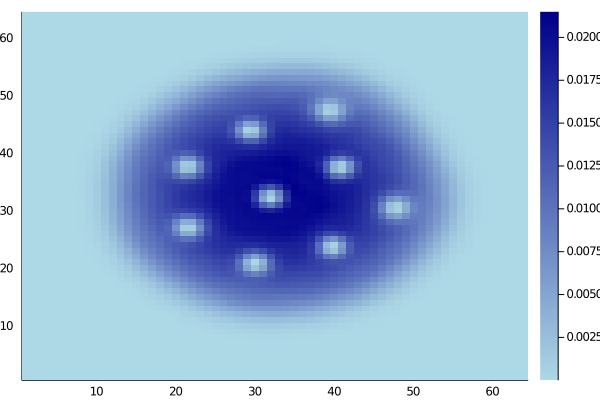

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)